
# Homework 3 - Problemi inversi e imaging
Questo homework utilizza anche il pacchetto InverseProblems scaricabile
dal sito di Virtuale del corso.

## 1. Problemi inversi


Utilizzare la funzione gravity del file examples.py per creare un problema
test.

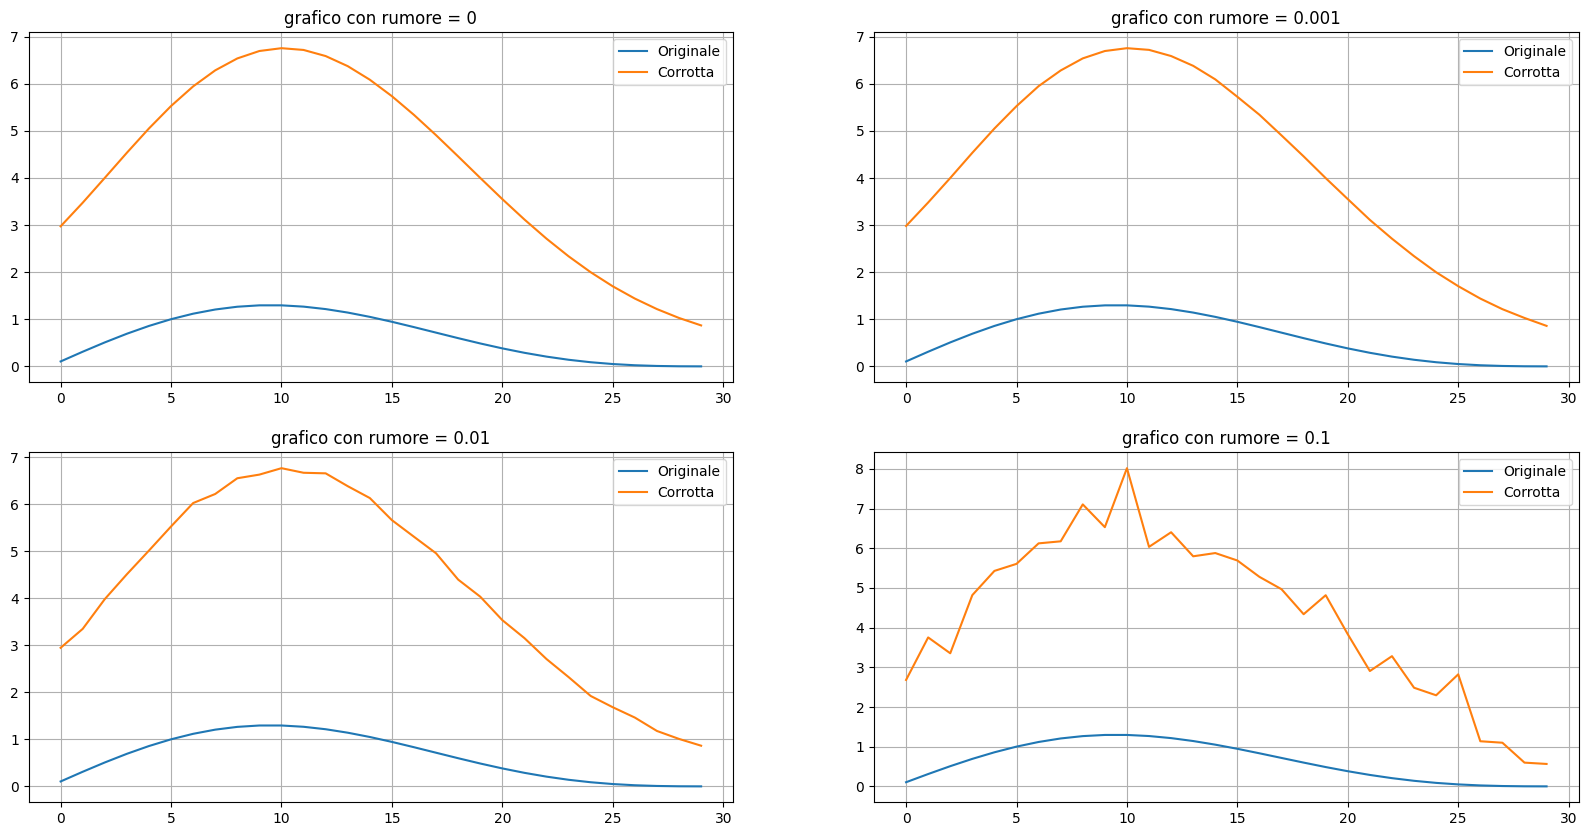

In [2]:
from ProblemiInversi import examples, operators, solvers, utilities
import numpy as np
import matplotlib.pyplot as plt

#rumore
noise_list= [0, 0.001, 0.01, 0.1]
y_delta = []

# Dimensione del problema
n = 30 
plt.figure(figsize=(20,10))

# Generazione della matrice A e del vettore soluzione x
A, x = examples.gravity(n)

# Costruzione del vettore dati y
y = A @ x

for i,noise in enumerate(noise_list):
    # Aggiunta di rumore al vettore dati
    y_delta.append(y + utilities.gaussian_noise(y, noise_level=noise)) 

    # Visualizzazione del problema test
    plt.subplot(2,2,i+1)
    plt.plot(x)
    plt.plot(y_delta[i])
    plt.legend(["Originale", "Corrotta"])
    plt.title(f"grafico con rumore = {noise}")
    plt.grid()
    
plt.show()    



- Visualizzare le condizioni discrete di Picard

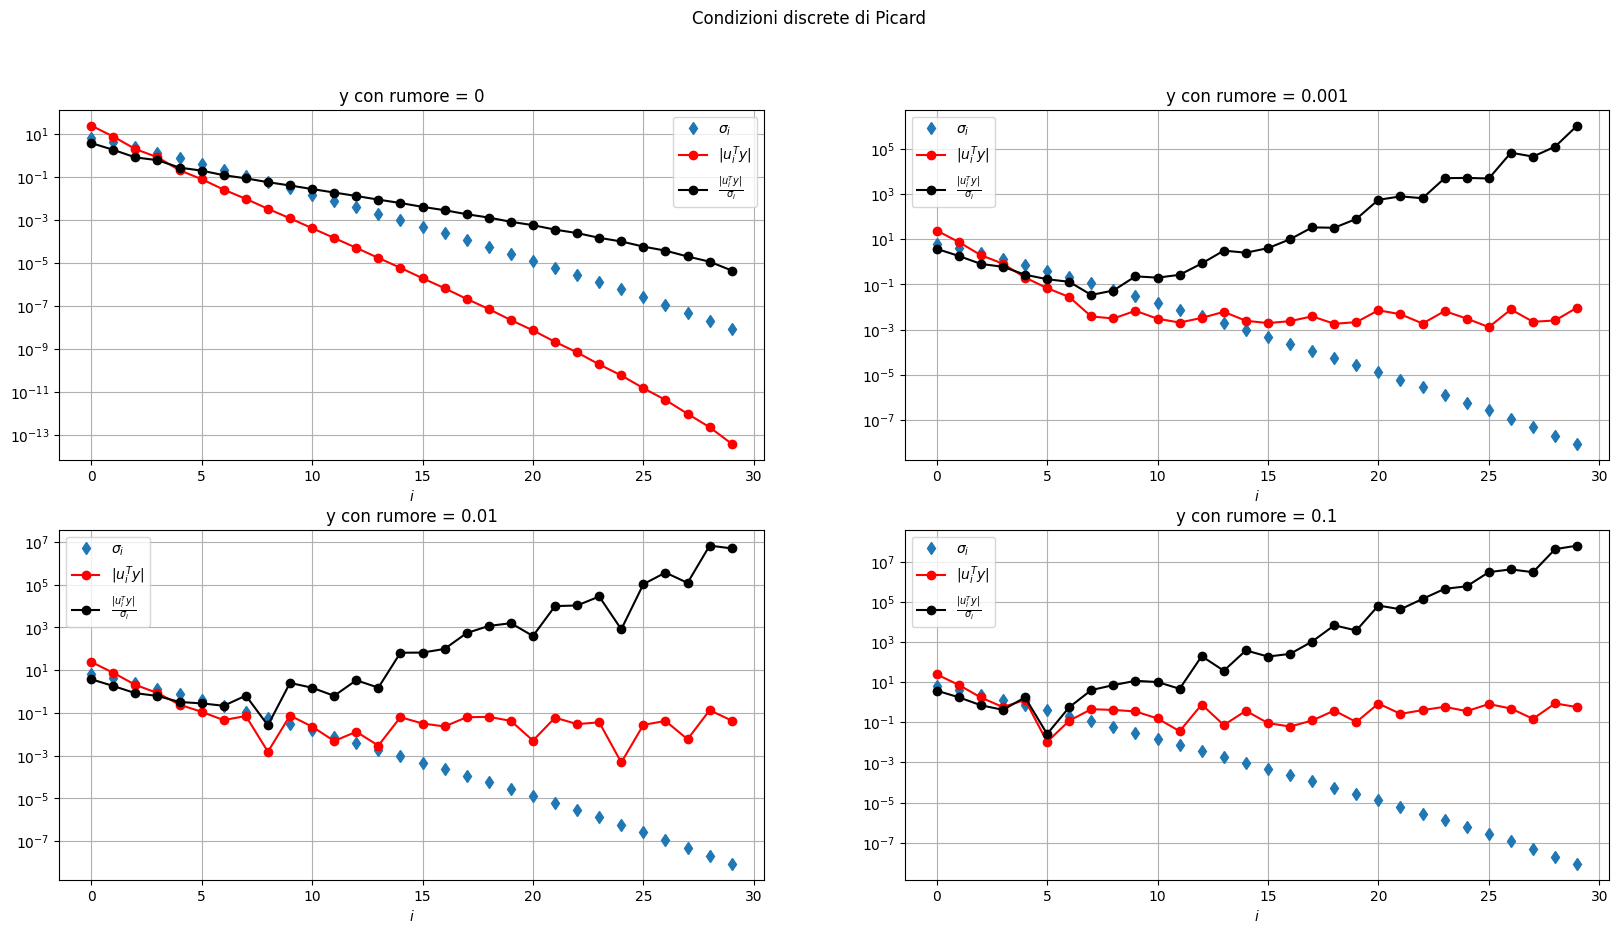

In [3]:
# Condizioni discrete di Picard
U, s, VT = np.linalg.svd(A, full_matrices=True) # Calcolo SVD di A

plt.figure(figsize=(20,10))

# Visualizzazione condizioni di Picard per y con rumore (y_delta)
#se rumore=0 y=y_delta
for i,noise in enumerate(noise_list):
   
    uTy = np.abs(U.T @ y_delta[i])
    pic_coeff = uTy / s

    plt.subplot(2,2,i+1)
    plt.suptitle("Condizioni discrete di Picard")
    plt.semilogy(s, "d")
    plt.semilogy(uTy, "ro-")
    plt.semilogy(pic_coeff, "ko-")
    plt.legend([r"$\sigma_i$", r"$| u_i^T y |$", r"$\frac{| u_i^T y |}{\sigma_i}$"])
    plt.xlabel(r"$i$")
    plt.title(f"y con rumore = {noise}")
    plt.grid()

plt.show()


- Calcolare la soluzione naive e visualizzarla

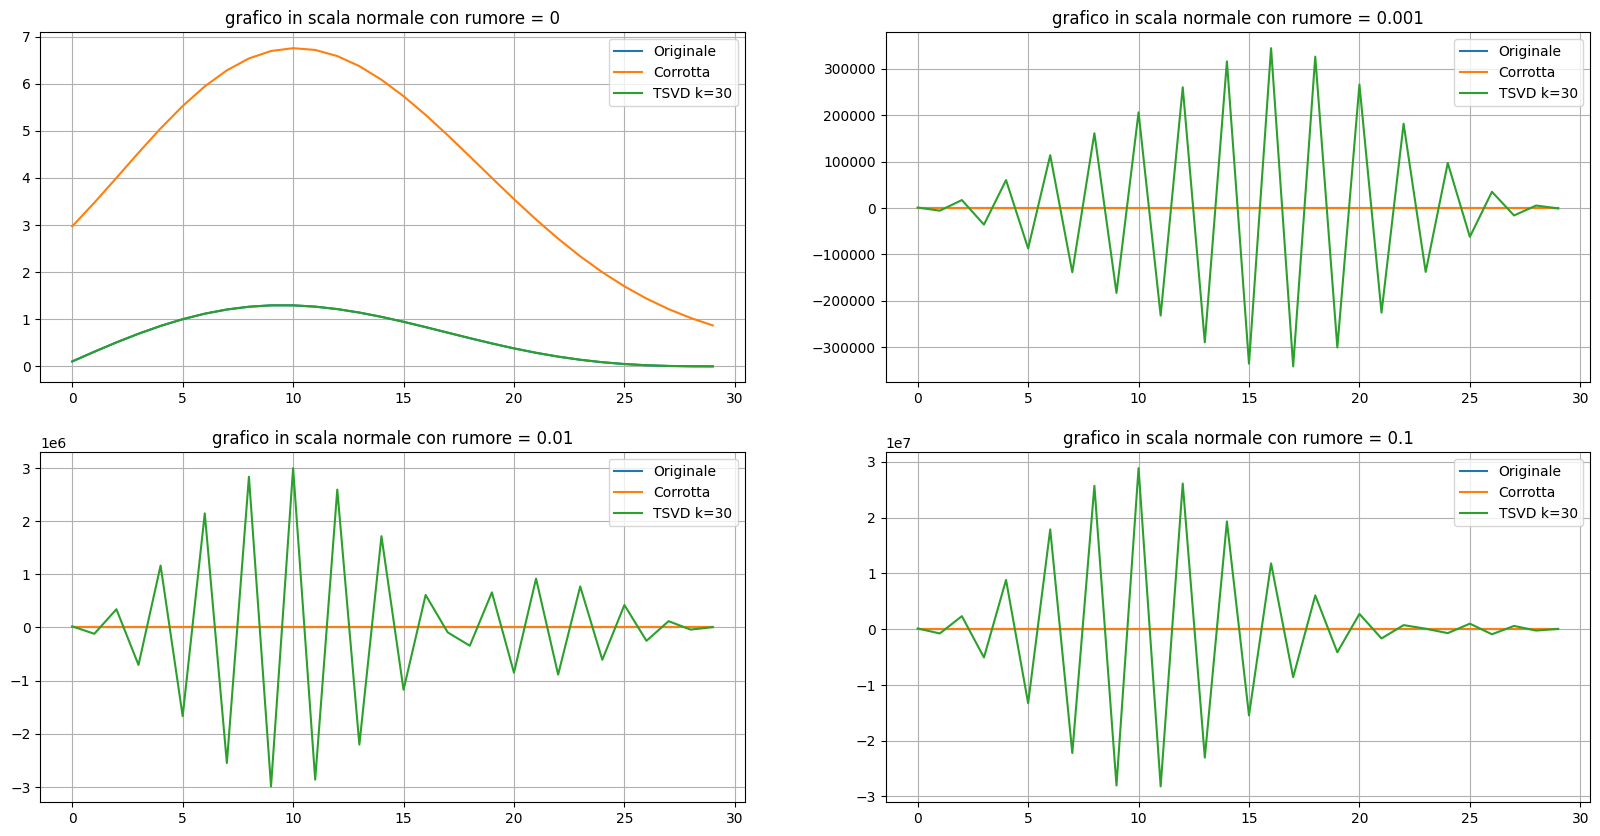

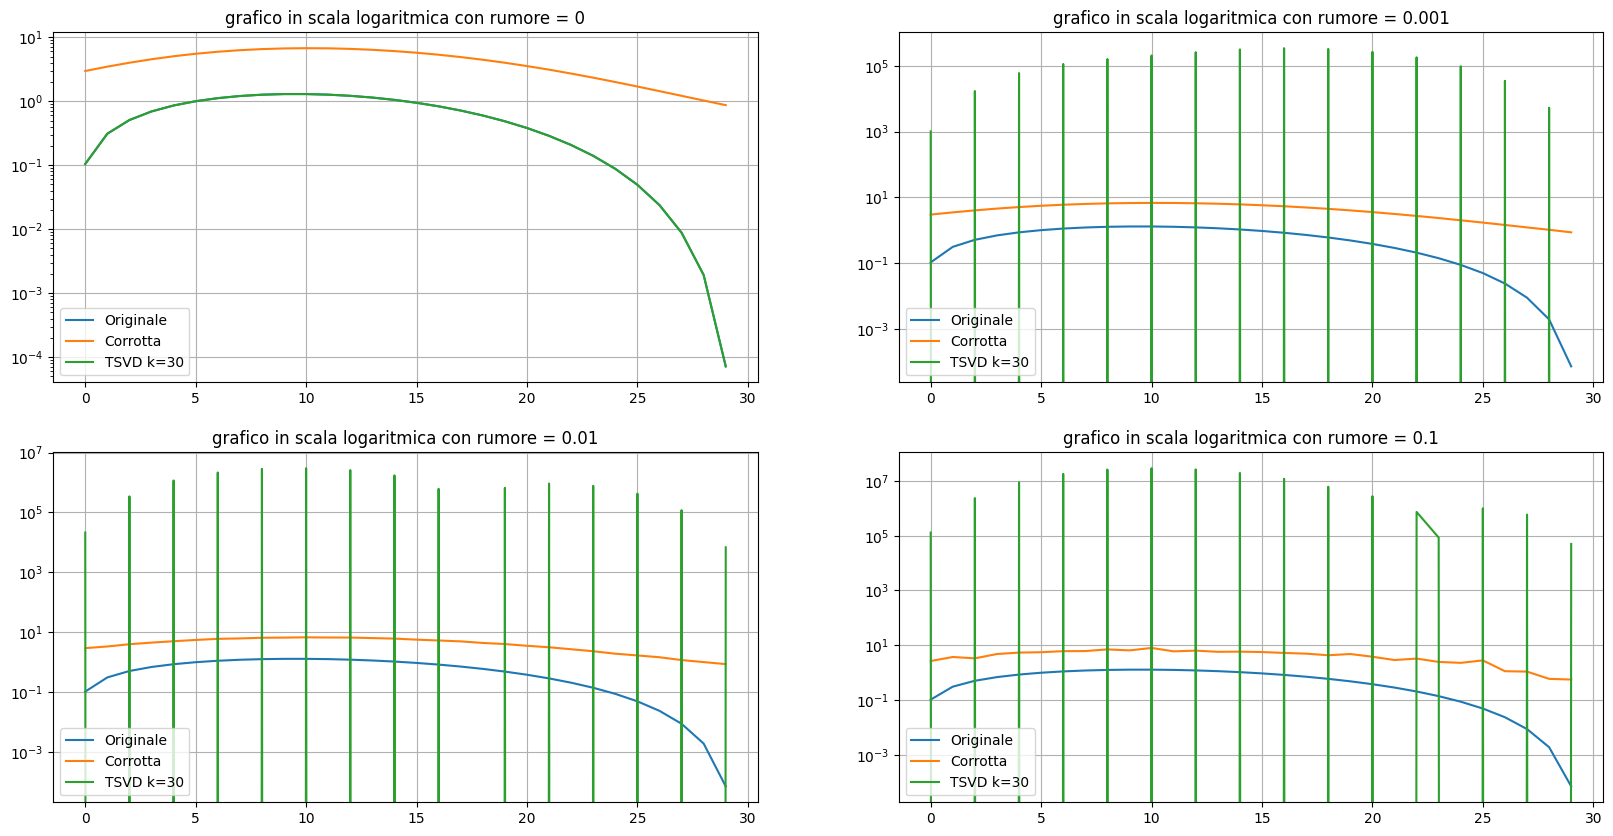

In [4]:
# TSVD
tsvd_solver = solvers.TSVD(A)

# Scelta di k
k = n
x_tsvd = []

for i, noise in enumerate(noise_list):
    # Soluzione naive per i diversi noise
    x_tsvd.append(tsvd_solver.solve(y_delta[i], k))

plt.figure(figsize=(20,10))
for i, noise in enumerate(noise_list):
    # Visualizzazione soluzione
    plt.subplot(2,2,i+1)
    plt.plot(x)
    plt.plot(y_delta[i])
    plt.plot(x_tsvd[i])
    plt.legend(["Originale", "Corrotta", f"TSVD k={k}"])
    plt.title(f"grafico in scala normale con rumore = {noise}")
    plt.grid()
plt.show()    
    
plt.figure(figsize=(20,10))
for i, noise in enumerate(noise_list):
    # Visualizzazione soluzione scala logaritmica
    plt.subplot(2,2,i+1)
    plt.semilogy(x)
    plt.semilogy(y_delta[i])
    plt.semilogy(x_tsvd[i])
    plt.legend(["Originale", "Corrotta", f"TSVD k={k}"])
    plt.title(f"grafico in scala logaritmica con rumore = {noise}")
    plt.grid()

plt.show()


- Calcolare la soluzione regolarizzata con TSVD e visualizzarla. Scegliere
il parametro utilizzando le condizioni di Picard.

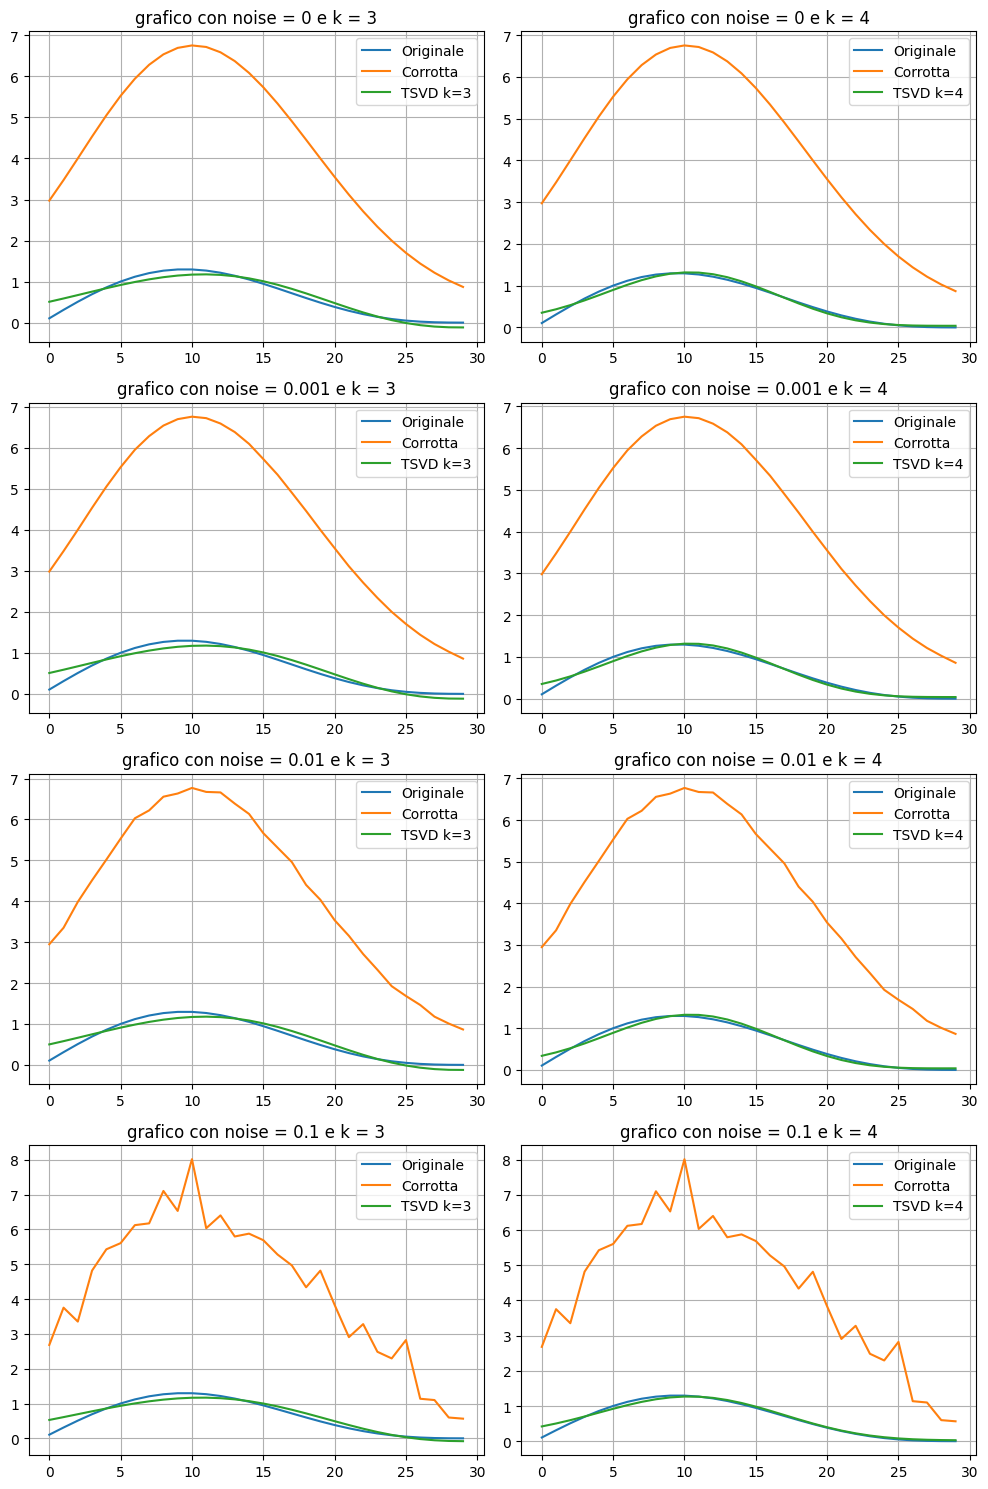

In [5]:
# TSVD
tsvd_solver = solvers.TSVD(A)

# Scelta di k
k_list = [3,4]

fig, axes =plt.subplots(4,2,figsize=(10,15))

for i, noise in enumerate(noise_list):
    x_tsvd = []
    for j,k in enumerate(k_list):
        # Soluzione
        x_tsvd.append(tsvd_solver.solve(y_delta[i], k))

    for j,k in enumerate(k_list):
        # Visualizzazione soluzione
        axes[i, j].plot(x)
        axes[i, j].plot(y_delta[i])
        axes[i, j].plot(x_tsvd[j])
        axes[i, j].legend(["Originale", "Corrotta", f"TSVD k={k}"])
        axes[i, j].set_title(f"grafico con noise = {noise} e k = {k}")
        axes[i, j].grid()
        
plt.tight_layout()
plt.show()


- Calcolare la soluzione regolarizzata con Tikhonov e visualizzarla.
Scegliere il parametro utilizzando il principio di massima Discrepanza
e utilizzando un metodo euristico trial and error. Quali considerazioni posso fare?

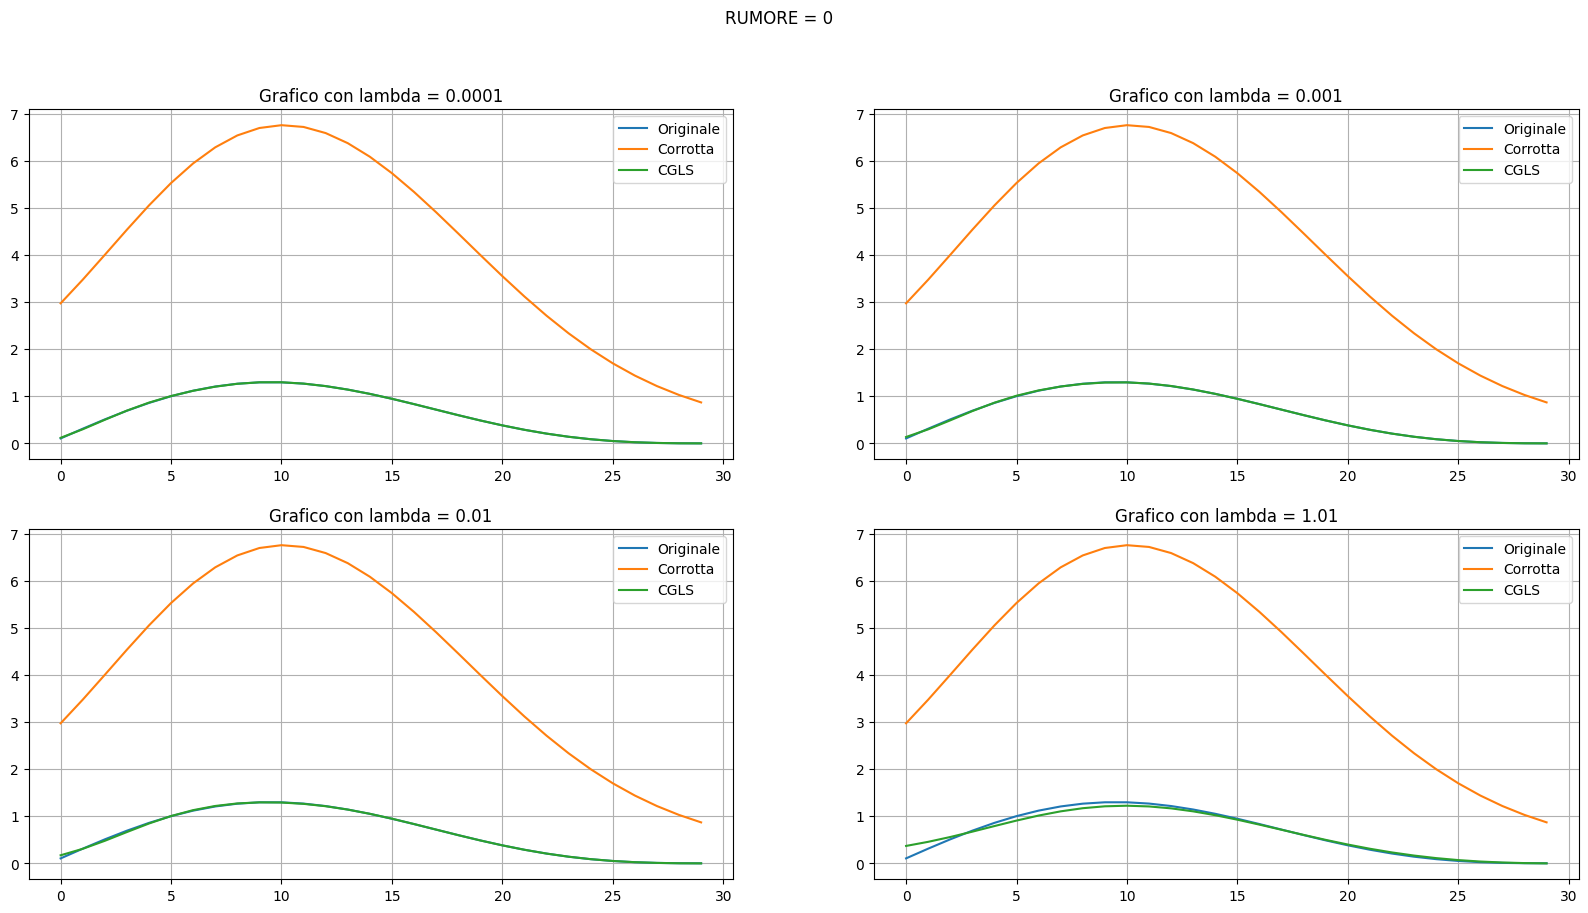

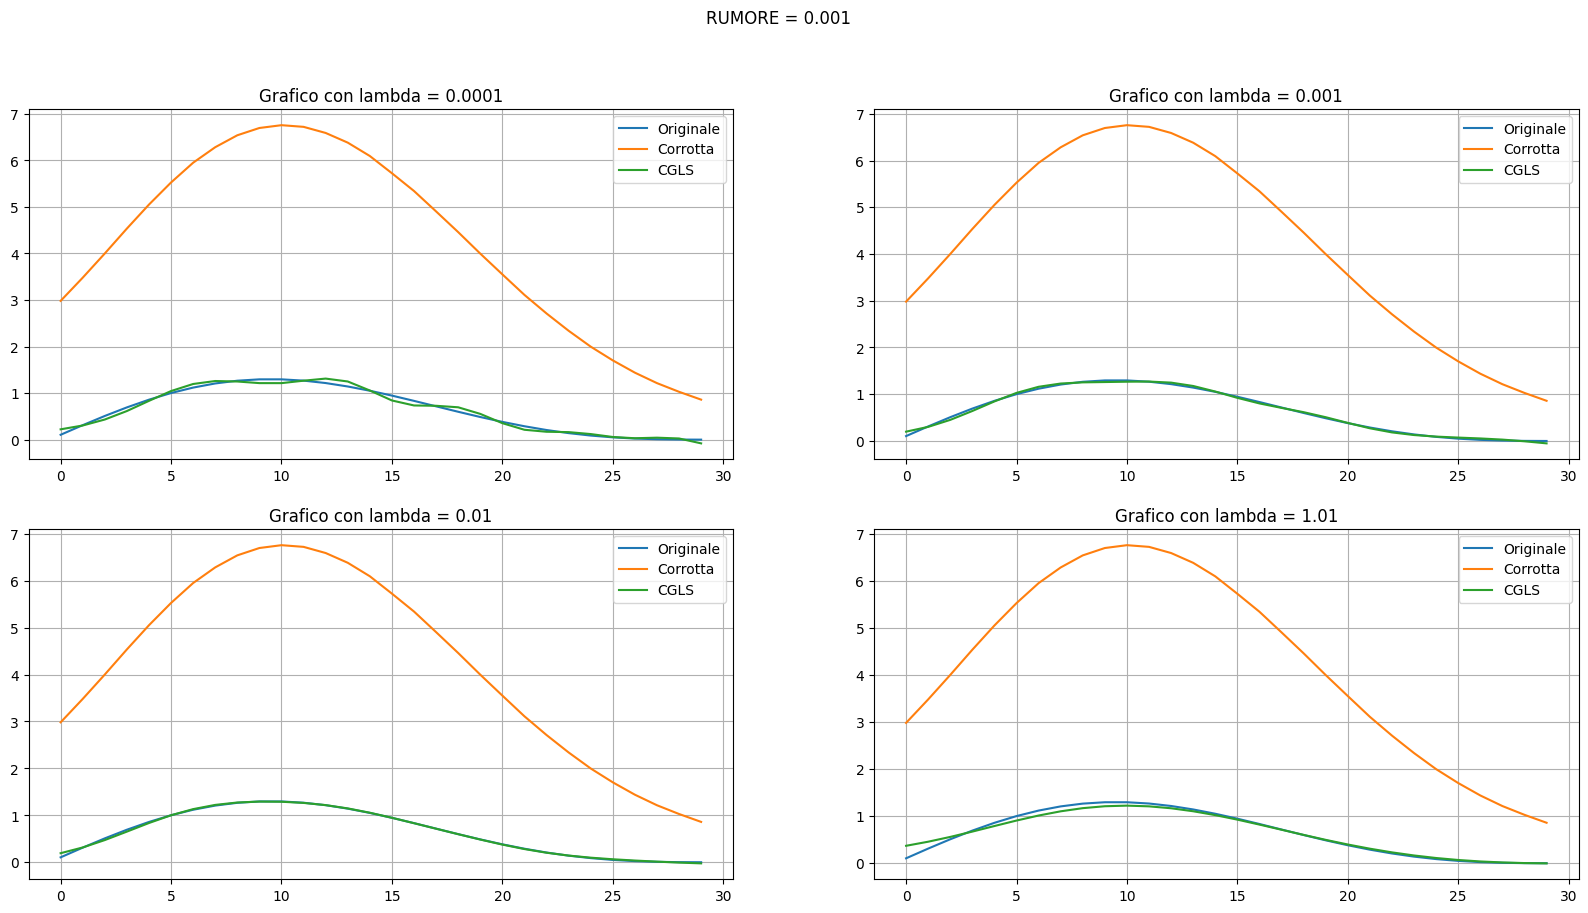

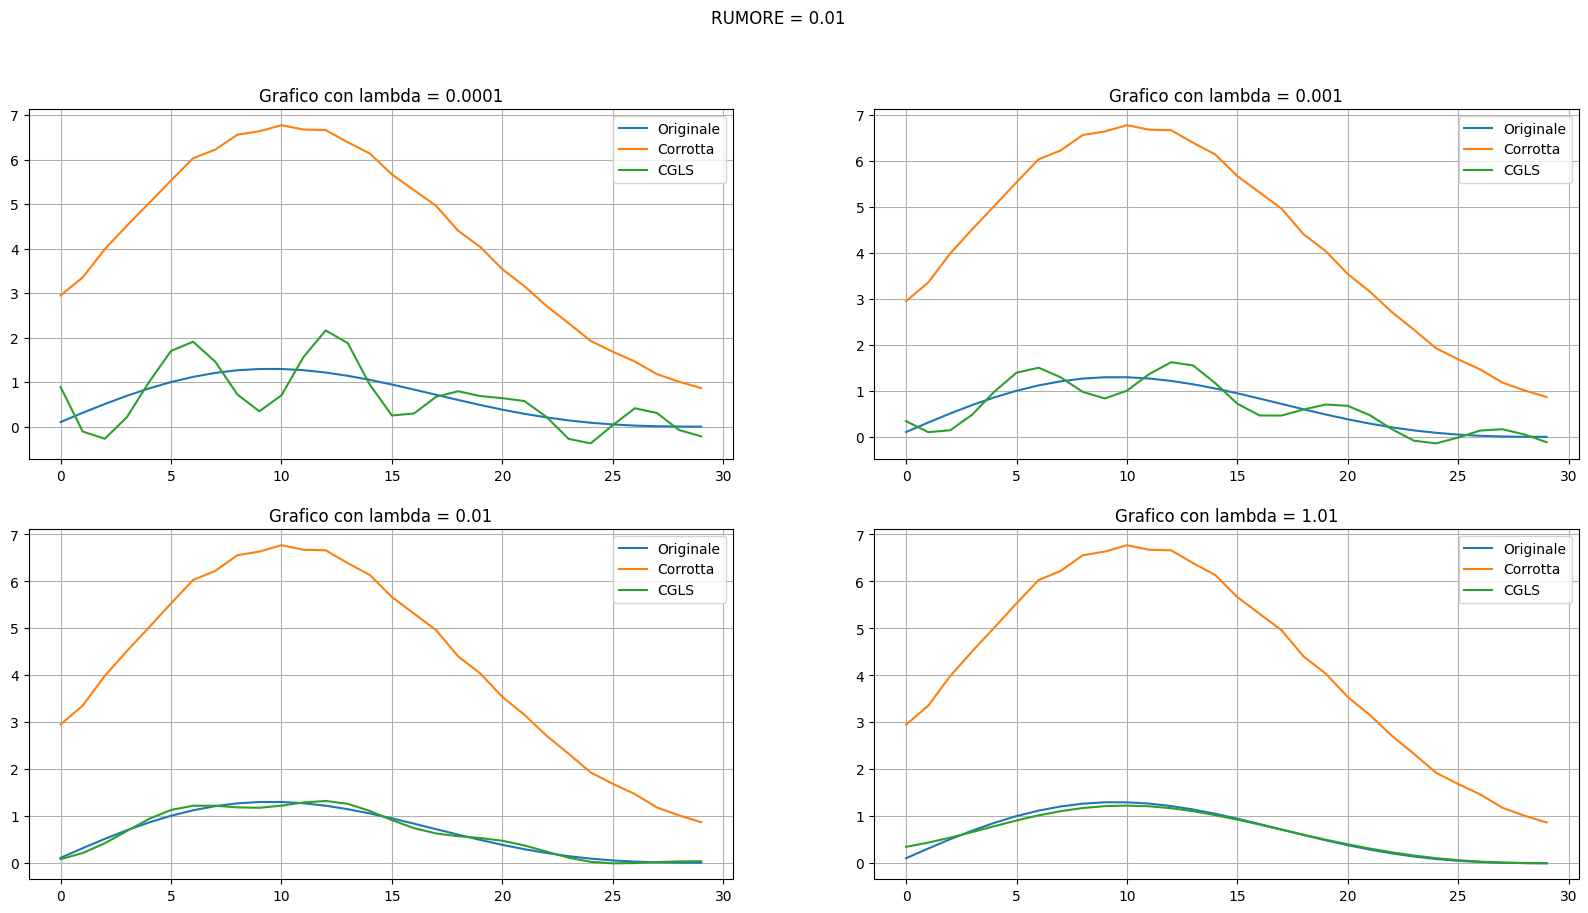

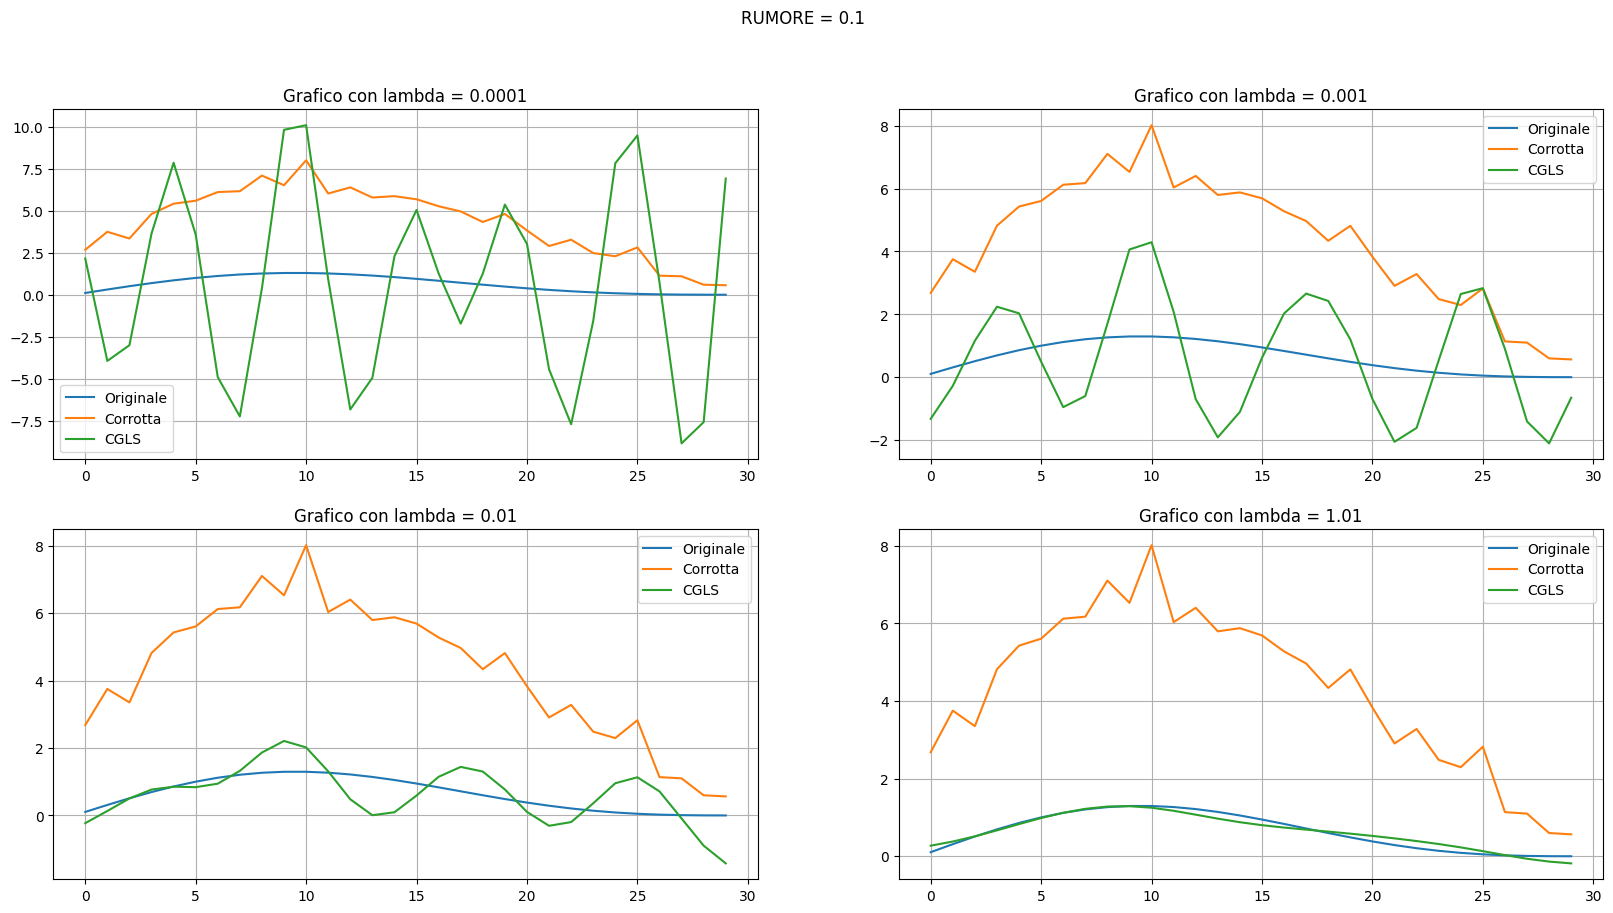

In [6]:
# Tikhonov
tik_solver = solvers.Tikhonov(A)

# Scelta di lambda, L
lmbda_list = [0.0001, 0.001, 0.01, 1.01]

for j, noise in enumerate(noise_list):
    plt.figure(figsize=(20,10))
    for i, lmbda in enumerate(lmbda_list):
        # Soluzione
        x_tik = tik_solver.solve(y_delta[j], lmbda)

        # Visualizzazione soluzione
        plt.subplot(2,2,i+1)
        plt.suptitle(f"RUMORE = {noise}")
        plt.plot(x)
        plt.plot(y_delta[j])
        plt.plot(x_tik)
        plt.legend(["Originale", "Corrotta", f"CGLS"])
        plt.title(f"Grafico con lambda = {lmbda}")
        plt.grid()

    plt.show()  
    


Ripetere i punti precedenti per tre-quattro diversi livelli di rumore, nell’intervallo
$[0, 0.1]$ (estremi compresi)